In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Data exploration

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [66]:
df['title']. nunique()

118840

In [67]:
df['description'].nunique()

119955

In [68]:
df.isnull().sum(axis = 0)

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [69]:
# Data cleaning

In [70]:
#Define a new region column
df["region"] = df["region_1"].fillna(df["region_2"])
df.isnull().sum(axis = 0)

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
region                   21247
dtype: int64

In [71]:
df_clean=df.drop(['Unnamed: 0','description','region_2','region_1','taster_name','taster_twitter_handle'], axis=1)
df_clean.head()

,country,designation,points,price,province,title,variety,winery,region
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Etna
1,Portugal,Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN
2,US,NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Willamette Valley
3,US,Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Lake Michigan Shore
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Willamette Valley


In [72]:
df_clean['average score'] = df_clean.groupby('title')['points'].transform('mean')
df_clean.head()

,country,designation,points,price,province,title,variety,winery,region,average score
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Etna,87.0
1,Portugal,Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,87.0
2,US,NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Willamette Valley,87.0
3,US,Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Lake Michigan Shore,87.0
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Willamette Valley,87.0


In [73]:
df_grouped=df_clean.groupby('title').first().reset_index()

In [74]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118840 entries, 0 to 118839
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   title          118840 non-null  object 
 1   country        118781 non-null  object 
 2   designation    84551 non-null   object 
 3   points         118840 non-null  int64  
 4   price          110638 non-null  float64
 5   province       118781 non-null  object 
 6   variety        118839 non-null  object 
 7   winery         118840 non-null  object 
 8   region         99346 non-null   object 
 9   average score  118840 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 9.1+ MB


In [75]:
df_2=df_grouped.drop(['points'], axis=1)

In [76]:
df_2.head()

,title,country,designation,price,province,variety,winery,region,average score
0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,Rosé,18.0,Catalonia,Cabernet Sauvignon,1+1=3,Penedès,82.0
1,1+1=3 NV Brut Sparkling (Cava),Spain,Brut,16.0,Catalonia,Sparkling Blend,1+1=3,Cava,87.0
2,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Spain,Cygnus Brut Nature Reserva Made With Organic G...,20.0,Catalonia,Sparkling Blend,1+1=3,Cava,89.0
3,1+1=3 NV Rosé Sparkling (Cava),Spain,Rosé,20.0,Catalonia,Sparkling Blend,1+1=3,Cava,86.0
4,10 Knots 2006 Beachcomber White (Paso Robles),US,Beachcomber,21.0,California,Rhône-style White Blend,10 Knots,Paso Robles,83.0


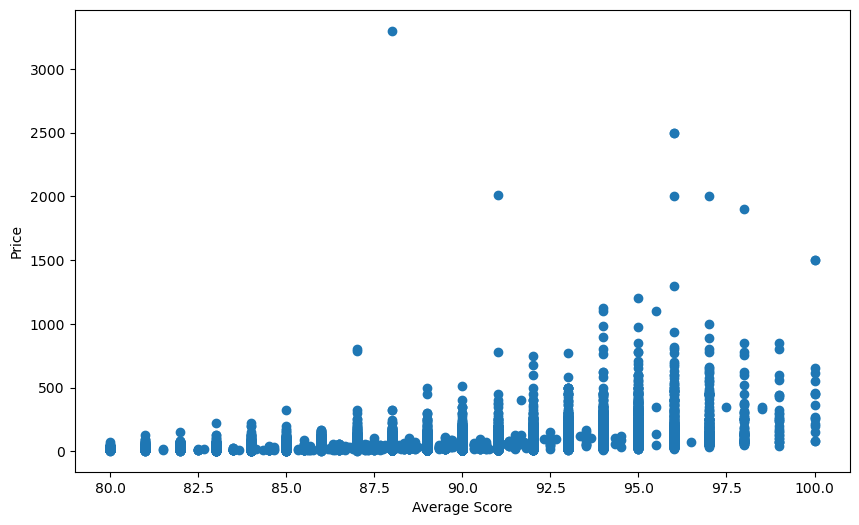

In [79]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_2['average score'], df_2['price'])
ax.set_xlabel('Average Score')
ax.set_ylabel('Price')
plt.show()

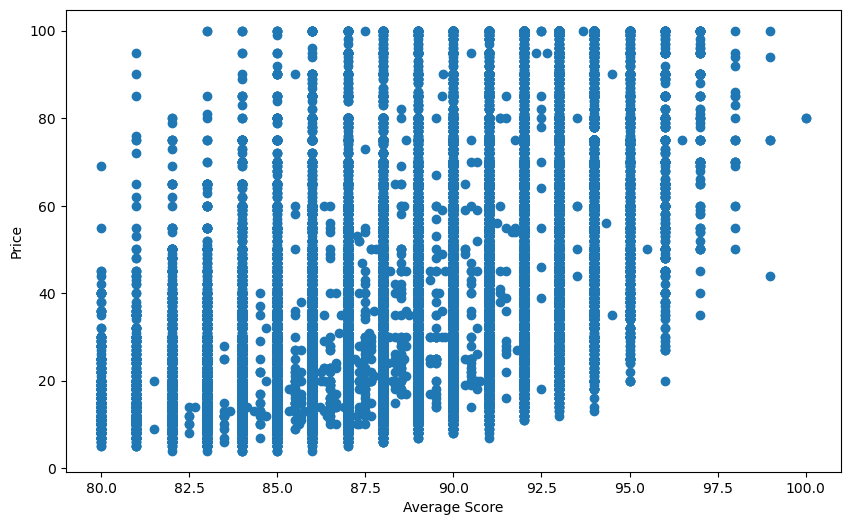

In [92]:
df_4 = df_2[df_2['price'] <= 100]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_4['average score'], df_4['price'])
ax.set_xlabel('Average Score')
ax.set_ylabel('Price')
plt.show()

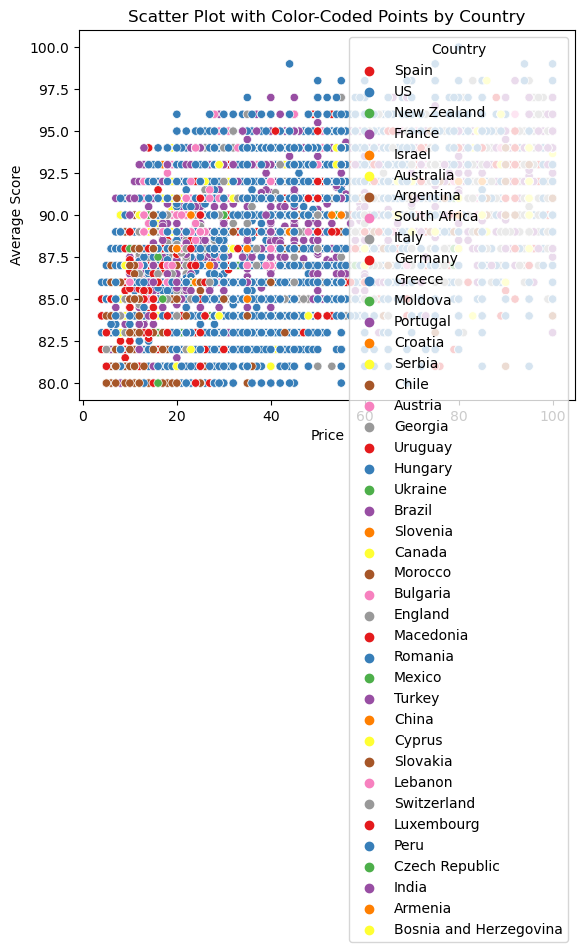

In [95]:
sns.scatterplot(x='price', y='average score', hue='country', data=df_4, palette='Set1')
plt.title('Scatter Plot with Color-Coded Points by Country')
plt.xlabel('Price')
plt.ylabel('Average Score')
plt.legend(title='Country')
plt.show()

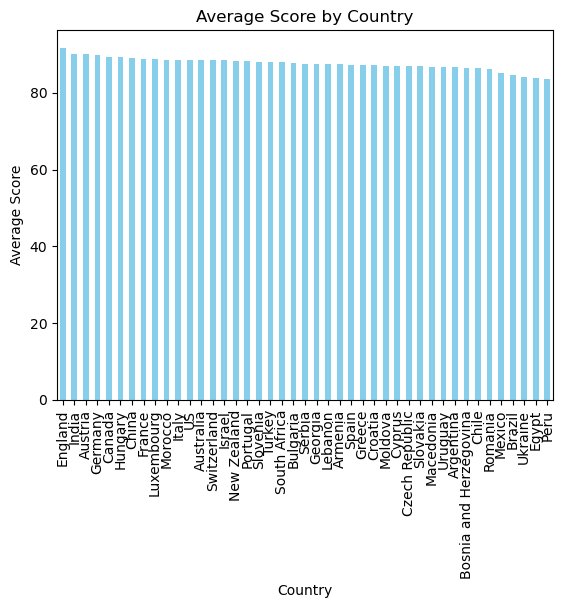

In [85]:
df_2['country score'] = df_2.groupby(['country'])['average score'].transform('mean')
average_score_by_country = df_2.groupby('country')['country score'].mean()
average_score_by_country = average_score_by_country.sort_values(ascending=False)
average_score_by_country.plot(kind='bar', color='skyblue')
plt.title('Average Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.show()

In [88]:
df_2['variety'].nunique()

707

In [96]:
df_5 = df_4[df_4['country'] != 'US']

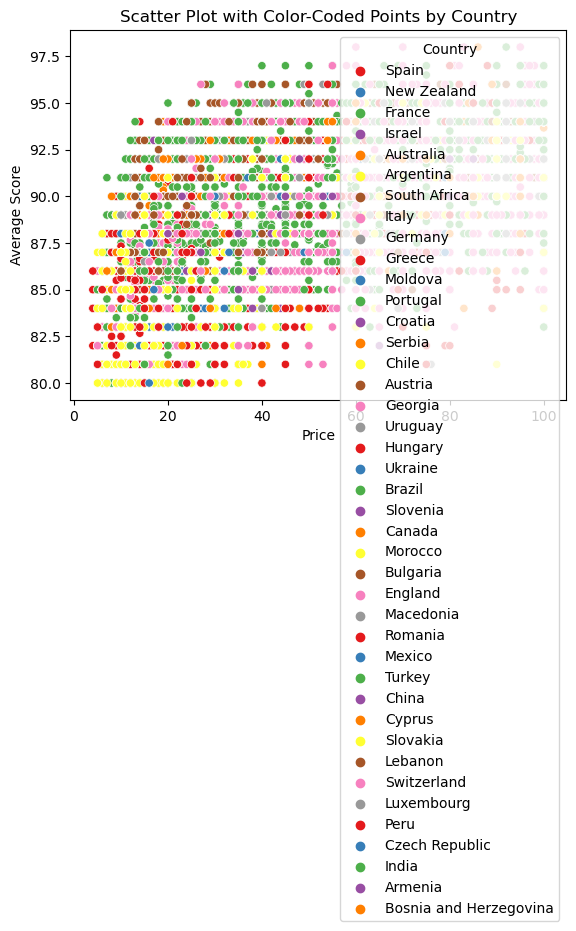

In [97]:
sns.scatterplot(x='price', y='average score', hue='country', data=df_5, palette='Set1')
plt.title('Scatter Plot with Color-Coded Points by Country')
plt.xlabel('Price')
plt.ylabel('Average Score')
plt.legend(title='Country')
plt.show()